In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
import os
import matplotlib.pyplot as plt

In [7]:
# DF_TRAIT, DF_ANNOT, DF_PANNOT
DF_TRAIT = pd.read_csv('/n/groups/price/martin/LDSPEC_data/results/tables/trait_info.tsv', sep='\t')
DF_TRAIT.index = DF_TRAIT['Trait_Identifier']
TRAIT_LIST = list(DF_TRAIT.index)
TRAIT_LIST_INDPT = list(DF_TRAIT.index[DF_TRAIT['Indpt']])
print("n_trait=%d" % len(TRAIT_LIST))
print("n_trait_indpt=%d" % len(TRAIT_LIST_INDPT))

SUMSTATS_FILE='/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/sumstats/@.nomhc.sumstats.gz'

# afreq file 
FREQ_FILE = '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/imp_geno_chimp/'\
    'ukb_imp_chr@_v3_chimp.afreq'
dic_freq = {}
for CHR in range(1,23):
    temp_df = pd.read_csv(FREQ_FILE.replace('@', '%d'%CHR), sep='\t')
    temp_dic = {x:y for x,y in zip(temp_df['ID'], temp_df['ALT_FREQS'])}
    dic_freq.update(temp_dic)
    
# df_snp : REF:REF_Chimp, ALT: derived
PVAR_FILE = '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/imp_geno_chimp/'\
    'ukb_imp_chr@_v3_chimp.pvar'
df_snp = []
for CHR in range(1,23):
    df_snp.append(pd.read_csv(PVAR_FILE.replace('@', '%d'%CHR), sep='\t'))
df_snp = pd.concat(df_snp, axis=0)

n_trait=70
n_trait_indpt=29


### Update sumstats 

In [27]:
OUT_PATH='/n/groups/price/martin/LDSPEC_data/res_cojo_rv1/sumstats'
for trait in TRAIT_LIST_INDPT:
    print(trait)
    df_sumstats = pd.read_csv(SUMSTATS_FILE.replace('@', trait), sep="\t", index_col=None)
    df_sumstats['freq'] = [dic_freq[x] for x in df_sumstats['SNP']]
    df_sumstats['se'] = 1 / np.sqrt(2 * df_sumstats['N'] * df_sumstats['freq'] * (1-df_sumstats['freq']))
    df_sumstats['b'] = df_sumstats['Z'] * df_sumstats['se']
    df_sumstats['p'] = chi2.sf(df_sumstats['Z']**2, df=1)  
    df_sumstats = df_sumstats[['SNP', 'A1', 'A2', 'freq', 'b', 'se', 'p', 'N', 'Z']]
    df_sumstats.to_csv('%s/%s.sumstats'%(OUT_PATH,trait), sep='\t', index=False)

biochemistry_AlkalinePhosphatase
biochemistry_AspartateAminotransferase
biochemistry_Cholesterol
biochemistry_Creatinine
biochemistry_IGF1
biochemistry_Phosphate
biochemistry_TotalBilirubin
biochemistry_TotalProtein
biochemistry_VitaminD
blood_PLATELET_COUNT
blood_RBC_DISTRIB_WIDTH
blood_RED_COUNT
blood_WHITE_COUNT
bmd_HEEL_TSCOREz
body_BALDING1
body_BMIz
body_HEIGHTz
body_WHRadjBMIz
bp_DIASTOLICadjMEDz
cov_EDU_YEARS
disease_ALLERGY_ECZEMA_DIAGNOSED
disease_HYPOTHYROIDISM_SELF_REP
lung_FEV1FVCzSMOKE
lung_FVCzSMOKE
mental_NEUROTICISM
other_MORNINGPERSON
repro_MENARCHE_AGE
repro_MENOPAUSE_AGE
repro_NumberChildrenEverBorn_Pooled


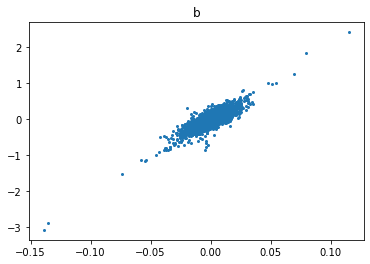

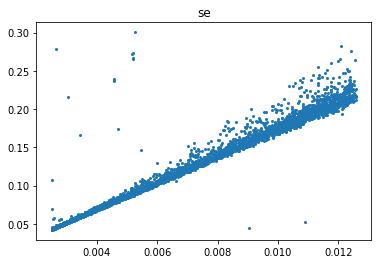

TypeError: loop of ufunc does not support argument 0 of type float which has no callable log10 method

In [18]:
# # Compare with previous sumstats 
# df_sumstats_ref = pd.read_csv(
#     '/n/groups/price/martin/gene_dir_effect/sumstats_lipids/'
#     'bolt_460K_selfRepWhite.biochemistry_AlkalinePhosphatase.sumstats', sep='\t',
# )

# snp_list = list(set(df_sumstats['SNP']) & set(df_sumstats_ref['SNP']))
# snp_list = np.random.choice(snp_list, size=10000, replace=False)

# for term1,term2 in [['b', 'BETA'], ['se', 'SE'], ['p', 'P_BOLT_LMM']]:
#     df_plot = pd.DataFrame(index=snp_list, columns=['term1', 'term2'], dtype=float)
#     temp_dic = {x:y for x,y in zip(df_sumstats['SNP'], df_sumstats[term1])}
#     df_plot['term1'] = [temp_dic[x] for x in df_plot.index]
#     temp_dic = {x:y for x,y in zip(df_sumstats_ref['SNP'], df_sumstats_ref[term2])}
#     df_plot['term2'] = [temp_dic[x] for x in df_plot.index]
#     df_plot['term2'] = df_plot['term2'].astype(float)
    
#     if term1 == 'p':
#         df_plot['term1'] = -np.log10(df_plot['term1'])
#         df_plot['term2'] = -np.log10(df_plot['term2'])
        
#     plt.figure()
#     plt.scatter(df_plot['term1'], df_plot['term2'], s=4)
#     plt.title(term1)
#     plt.show()